In [38]:
clusters=[0,4,14,15]
iconv=[1,2,3]
import xarray as xr
import numpy as np
iwrite=0
if iwrite==1:
    for c in clusters:
        ac=np.nonzero(kmeans.labels_==c)
        zKu_c=zKu[iconvLand][ac]
        zKa_c=zKa[iconvLand][ac]
        precip_c=precip[iconvLand][ac]
        precipDPR_c=precipDPR[iconvLand][ac]
        precipCMB_c=precipDPR[iconvLand][ac]
        bzd_c=bzd[iconvLand][ac]
        bcf_c=bcf[iconvLand][ac]
        PIAhybrid_c=PIAhybrid[iconvLand][ac]
        PIAhybridDPR_c=PIAhybrid[iconvLand][ac]
        hzero_c=PIAhybrid[iconvLand][ac]

    zKu=xr.DataArray(zKu_c,dims=['nprofs','nx','ny','nbins'])
    zKa=xr.DataArray(zKa_c,dims=['nprofs','nx','ny','nbins'])
    precip=xr.DataArray(precip_c,dims=['nprofs','nx','ny','nrain'])
    precipDPR=xr.DataArray(precipDPR_c,dims=['nprofs','nx','ny','nrain'])
    precipCMB=xr.DataArray(precipCMB_c,dims=['nprofs','nx','ny','nrainCMB'])
    bzd=xr.DataArray(bzd_c,dims=['nprofs','nx','ny'])
    bcf=xr.DataArray(bcf_c,dims=['nprofs','nx','ny'])
    PIAhybrid=xr.DataArray(PIAhybrid_c,dims=['nprofs','nx','ny'])
    PIAhybridDPR=xr.DataArray(PIAhybridDPR_c,dims=['nprofs','nx','ny','n2'])
    hzero=xr.DataArray(hzero_c,dims=['nprofs','nx','ny'])
    d=xr.Dataset({'zKu':zKu,'zKa':zKa,'precip':precip,'precipDPR':precipDPR,'precipCMB':precipCMB,'bzd':bzd,'bcf':bcf,'PIAhybrid':PIAhybrid,'PIAhybridDPR':PIAhybridDPR,'hzero':hzero})
    d.to_netcdf('cluster%2.2i'%c+'.nc',encoding={'zKu':{'zlib':True,'complevel':5},'zKa':{'zlib':True,'complevel':5},'precip':{'zlib':True,'complevel':5},'precipDPR':{'zlib':True,'complevel':5},'precipCMB':{'zlib':True,'complevel':5},'bzd':{'zlib':True,'complevel':5},'bcf':{'zlib':True,'complevel':5},'PIAhybrid':{'zlib':True,'complevel':5},'PIAhybridDPR':{'zlib':True,'complevel':5},'hzero':{'zlib':True,'complevel':5}})

import netCDF4 as nc
c=4
with nc.Dataset('cluster%2.2i'%c+'.nc') as d:
    zKu=d['zKu'][:]
    zKa=d['zKa'][:]
    precip=d['precip'][:]
    precipDPR=d['precipDPR'][:]
    precipCMB=d['precipCMB'][:]
    bzd=d['bzd'][:]
    bcf=d['bcf'][:]
    PIAhybrid=d['PIAhybrid'][:]
    PIAhybridDPR=d['PIAhybridDPR'][:]
    hzero=d['hzero'][:]
    zcmb=d['zcmb'][:]
    

(175.0, 0.0)

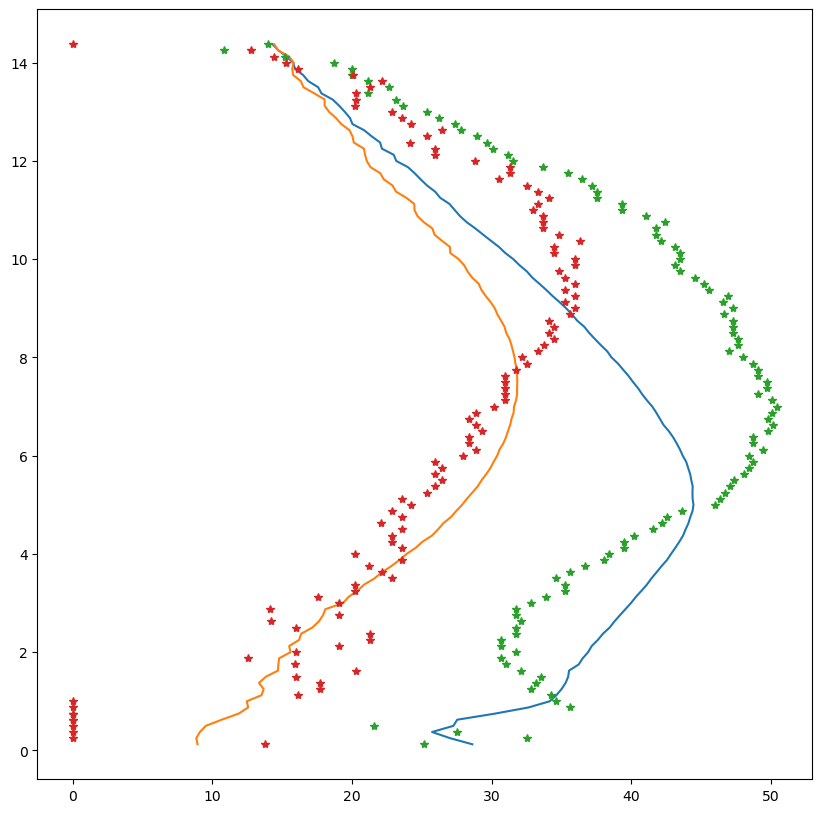

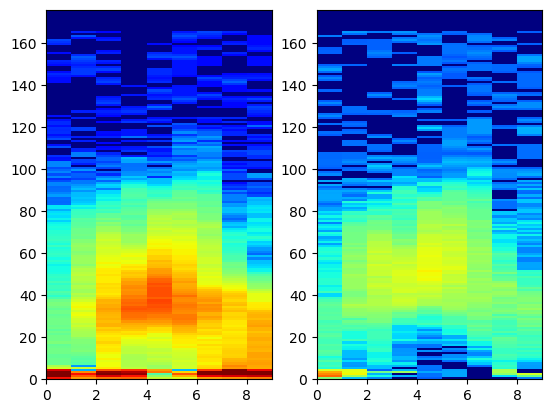

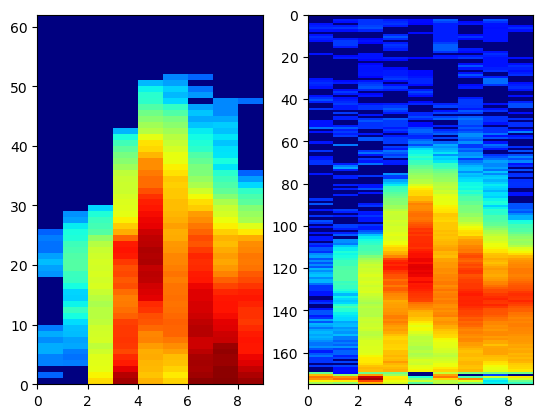

In [39]:
zKu[zKu<0]=0
zKa[zKa<0]=0
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(zKu[:,4,4,60:175].mean(axis=0),175*0.125-np.arange(60,175)*0.125,'-')
plt.plot(zKa[:,4,4,60:175].mean(axis=0),175*0.125-np.arange(60,175)*0.125,'-')
plt.plot(zKu[148,4,4,60:175],175*0.125-np.arange(60,175)*0.125,'*')
plt.plot(zKa[148,4,4,60:175],175*0.125-np.arange(60,175)*0.125,'*')
plt.figure()
plt.subplot(121)
plt.pcolormesh(zKu[100,:,4,::-1].T,cmap='jet',vmin=0,vmax=55)
plt.subplot(122)
plt.pcolormesh(zKa[100,:,4,::-1].T,cmap='jet',vmin=0,vmax=55)

plt.figure()
plt.subplot(121)
plt.pcolormesh(zcmb[148,:,4,::-1].T,cmap='jet',vmin=0,vmax=55)
#plt.ylim(175,0)
plt.subplot(122)
plt.pcolormesh(zKu[148,:,4,:].T,cmap='jet',vmin=0,vmax=55)
plt.ylim(175,0)

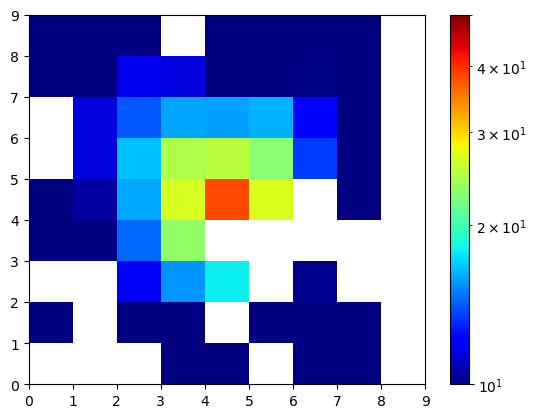

In [22]:
import matplotlib
plt.pcolormesh(precip[:,:,:,-1].mean(axis=0).T,cmap='jet',norm=matplotlib.colors.LogNorm(vmin=10,vmax=50)) 
plt.colorbar()  